In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style='dark')

In [4]:
df = pd.read_csv("../data/Crime_Data_from_2010_to_Present(cleaned).csv")

In [5]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Year,Month,Area,Crime,Vict Age,Vict Sex,Vict Descent,Weapon,Premises
0,2010,1,Hollywood,VIOLATION OF COURT ORDER,47,Female,White,HAND GUN,STREET
1,2010,1,Central,"RAPE, ATTEMPTED",47,Female,Hispanic,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",ALLEY
2,2010,1,Central,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,Male,Black,NaN,DEPARTMENT STORE
3,2010,1,Central,BURGLARY FROM VEHICLE,46,Male,Hispanic,NaN,STREET
4,2010,1,Central,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51,Male,Black,UNKNOWN WEAPON/OTHER WEAPON,OTHER PREMISE


In [6]:
to_plot1 = pd.DataFrame(df['Vict Sex'].value_counts()).drop(['Other'],axis=0)


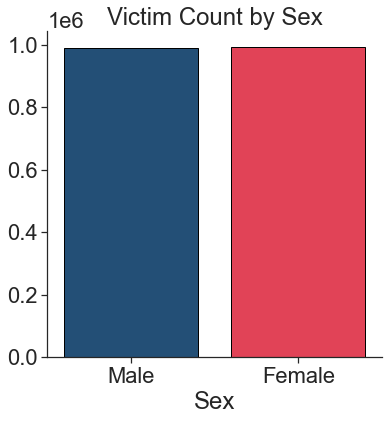

In [7]:
plt.figure(figsize=(6,6))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks",font_scale = 2, rc=custom_params)

ax = sns.barplot(x = to_plot1.index, y='Vict Sex', data=to_plot1,
                 palette = ['xkcd:light navy','xkcd:strawberry'], edgecolor = 'black', order=['Male','Female'], ci=None)
ax.set(xlabel='Sex', ylabel=None, title='Victim Count by Sex')

plt.show()

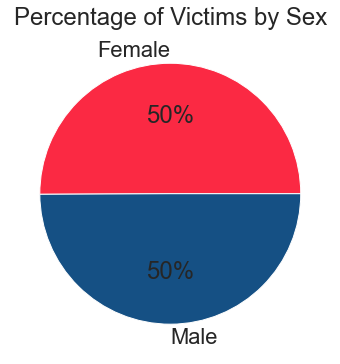

In [8]:
plt.figure(figsize=[6,6])
plt.pie(to_plot1['Vict Sex'], labels = to_plot1.index, colors = ['xkcd:strawberry','xkcd:light navy'], autopct='%.0f%%')
plt.title('Percentage of Victims by Sex')
plt.show()

In [9]:
to_plot2 = pd.DataFrame(df['Vict Descent'].value_counts()).drop(['Other','Unknown'],axis=0)

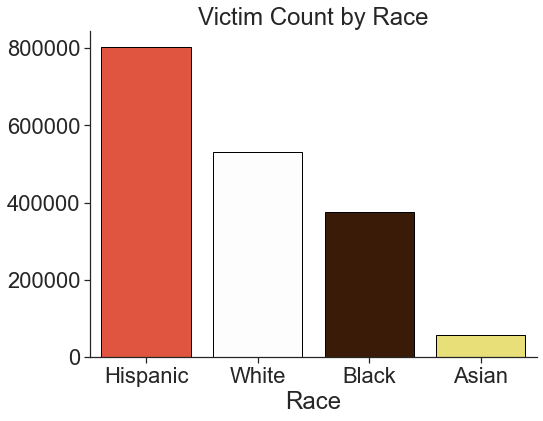

In [10]:
plt.figure(figsize=(8,6))

colors =['xkcd:orangey red','xkcd:pale grey','xkcd:chocolate brown','xkcd:yellowish']

ax = sns.barplot(x = to_plot2.index, y='Vict Descent',palette = colors ,edgecolor = 'black', data=to_plot2, ci=None)
ax.set(xlabel='Race', ylabel= None, title='Victim Count by Race')
plt.show()

In [11]:
a = pd.DataFrame(df.groupby(['Vict Sex','Vict Descent'])['Year'].count())

In [12]:
a.reset_index(inplace=True)

In [13]:
a.drop(a[((a['Vict Sex']== 'Other') | (a['Vict Descent'] == 'Unknown') | (a['Vict Descent'] == 'Other'))].index, inplace=True)

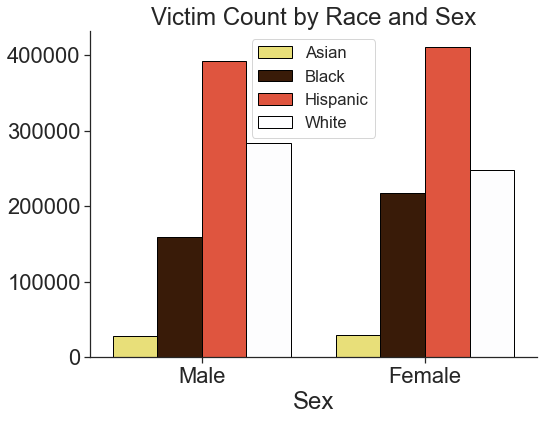

In [14]:
plt.figure(figsize=(8,6))

colors = ['xkcd:yellowish','xkcd:chocolate brown','xkcd:orangey red','xkcd:pale grey']
ax = sns.barplot(x = 'Vict Sex', y='Year', hue = 'Vict Descent', 
                 palette=colors,edgecolor = 'black',  order = ['Male','Female'], data=a,)
ax.set(xlabel='Sex', ylabel = None, title='Victim Count by Race and Sex')
ax.legend( fontsize = 'x-small')
plt.show()

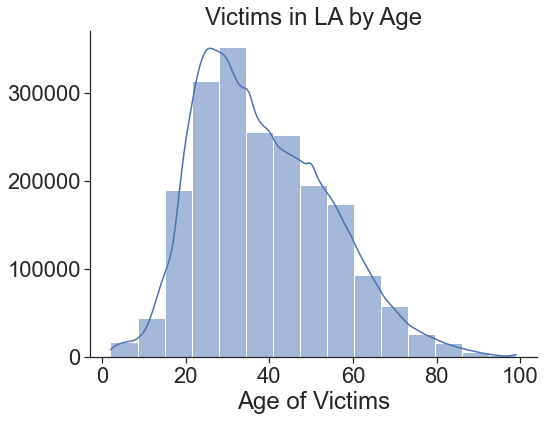

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(df['Vict Age'], kde = True, bins = 15)
plt.title('Victims in LA by Age')
plt.ylabel(None)
plt.xlabel('Age of Victims')
plt.show()

In [16]:
to_plot4 = pd.DataFrame(df['Area'].value_counts())
dangerous = to_plot4.head(5)

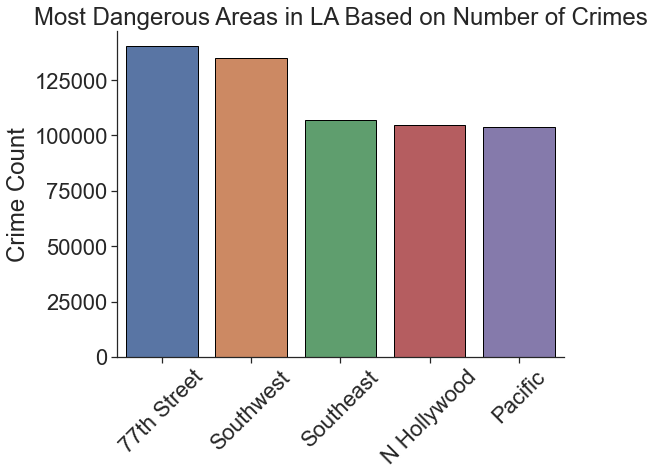

In [17]:
plt.figure(figsize=(8,6))
ax = sns.barplot( x= dangerous.index, y='Area', data = dangerous, edgecolor = 'black')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.ylabel('Crime Count')
plt.title('Most Dangerous Areas in LA Based on Number of Crimes')
plt.show()

In [18]:
safest = to_plot4.tail(5).sort_values(by='Area')

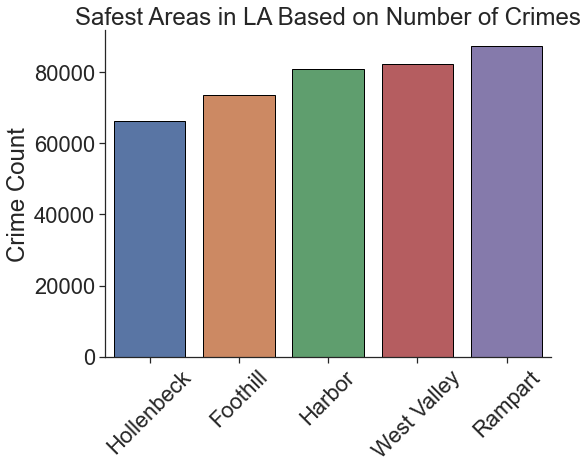

In [19]:
plt.figure(figsize=(8,6))
ax = sns.barplot( x= safest.index, y='Area', data = safest , edgecolor = 'black')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.ylabel('Crime Count')
plt.title('Safest Areas in LA Based on Number of Crimes')
plt.show()

In [20]:
d_area = df[df['Area'].str.contains('77th Street|Southwest|Southeast|N Hollywood|Pacific', regex=True)]

In [21]:
to_plot5 = d_area.groupby(['Area','Premises'])['Crime'].count().reset_index()


In [22]:
d = pd.DataFrame(to_plot5[(to_plot5['Area'] == '77th Street')].max())
d = d.T
c = pd.DataFrame(to_plot5[(to_plot5['Area'] == 'Southwest')].max())
c = c.T
l = pd.DataFrame(to_plot5[(to_plot5['Area'] == 'Southeast')].max())
l = l.T
k = pd.DataFrame(to_plot5[(to_plot5['Area'] == 'N Hollywood')].max())
k = k.T
x = pd.DataFrame(to_plot5[(to_plot5['Area'] == 'Pacific')].max())
x = x.T
merge = pd.concat([d,c,l,k,x])


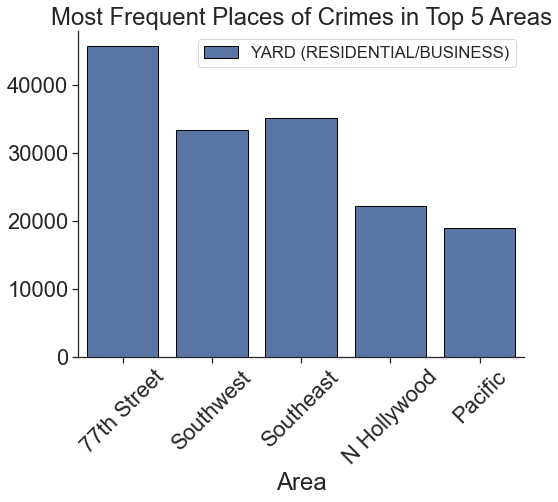

In [23]:
plt.figure(figsize = [8,6])
plot = sns.barplot(x = 'Area', y='Crime', hue = 'Premises', 
                edgecolor = 'black', data=merge)
plot.set(xlabel='Area', ylabel = None, title='Most Frequent Places of Crimes in Top 5 Areas')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 45)
plot.legend( fontsize = 'x-small')

plt.show()